In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
data_file = "merge_data.csv"
df = pd.read_csv(data_file)

In [3]:
df.head()

,datetime,sticker,Alpha1,dividend,pe,pb,roa,eps,return
0,2010-01-04,1,NaN,0.0,3.258554,13.130871,0.009611,0.528177,-0.027085
1,2010-01-05,1,NaN,0.0,3.258554,13.130871,0.009611,0.528177,-0.017291
2,2010-01-06,1,NaN,0.0,3.258554,13.130871,0.009611,0.528177,-0.017165
3,2010-01-07,1,NaN,0.0,3.258554,13.130871,0.009611,0.528177,-0.010921
4,2010-01-08,1,NaN,0.0,3.258554,13.130871,0.009611,0.528177,-0.002201


In [4]:
clean=df.dropna(axis=0, how='any').copy()
clean.head()

,datetime,sticker,Alpha1,dividend,pe,pb,roa,eps,return
23,2010-02-04,1,829.5,0.0,3.258554,13.130871,0.009611,0.528177,-0.016836
24,2010-02-05,1,1180.5,0.0,3.258554,13.130871,0.009611,0.528177,-0.009008
25,2010-02-08,1,1364.0,0.0,3.258554,13.130871,0.009611,0.528177,-0.020002
26,2010-02-09,1,1460.5,0.0,3.258554,13.130871,0.009611,0.528177,0.020410
27,2010-02-10,1,390.0,0.0,3.258554,13.130871,0.009611,0.528177,0.012735


In [5]:
clean.head()

,datetime,sticker,Alpha1,dividend,pe,pb,roa,eps,return
23,2010-02-04,1,829.5,0.0,3.258554,13.130871,0.009611,0.528177,-0.016836
24,2010-02-05,1,1180.5,0.0,3.258554,13.130871,0.009611,0.528177,-0.009008
25,2010-02-08,1,1364.0,0.0,3.258554,13.130871,0.009611,0.528177,-0.020002
26,2010-02-09,1,1460.5,0.0,3.258554,13.130871,0.009611,0.528177,0.020410
27,2010-02-10,1,390.0,0.0,3.258554,13.130871,0.009611,0.528177,0.012735


In [6]:
print("the shape of original data:", df.shape)
print("the shape of clean data: ", clean.shape)

the shape of original data: (5017381, 9)
the shape of clean data:  (4642822, 9)


max: 20452.057938
min: -85328.657362


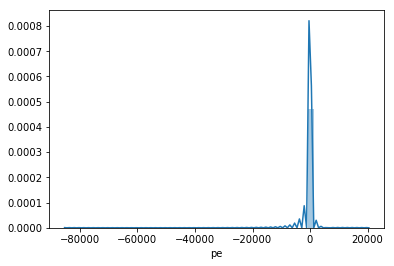

In [7]:
pe = clean['pe']
print('max:', pe.max())
print('min:', pe.min())
sns.distplot(pe)

## 数据的几种处理方式

1. Outliers 异常值

Define: If PE > 30 and PE < -2

Solvers: 
* replace them with upper limit and lower limit
* replace them with mean value or 0 or any other value:
    - mean value: this outliner have no function in the final regression model. Just act as the most items.

C:\Users\Guangli Jiang\Miniconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Guangli Jiang\Miniconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


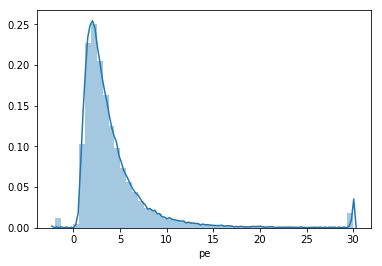

In [8]:
upper_limit = 30
lower_limit = -2
pe[pe > upper_limit] = upper_limit
pe[pe < lower_limit] = lower_limit
sns.distplot(pe)

## 归一化

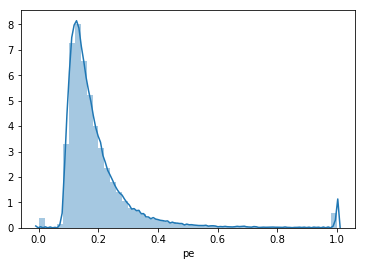

In [10]:
# method 1 
pe = (pe - pe.min()) / (pe.max() - pe.min())

# method 2
# pe = (pe - pe.mean()) / pe.std()

sns.distplot(pe)

In [11]:
# save to file 
clean.to_csv('clean.csv')